In [1]:
pip install pandas_profiling


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [3]:
data=pd.read_csv('fun data.csv')
data.head()

,f1,f2,f3,class
0,8.477937,0.436289,40.389470,1
1,6.704407,6.237227,65.349761,1
2,4.835130,4.500931,52.093300,1
3,5.179056,9.523951,79.049424,1
4,5.030426,4.569668,51.970028,1


In [4]:
model=LogisticRegression()
model.fit(data.iloc[:,:-1],data.iloc[:,-1])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
metrics.accuracy_score(data.iloc[:,-1],model.predict(data.iloc[:,:-1]))

0.965

In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
ovr=OneVsRestClassifier(LogisticRegression()).fit(data.iloc[:,:-1],data.iloc[:,-1])
ovo=OneVsOneClassifier(LogisticRegression()).fit(data.iloc[:,:-1],data.iloc[:,-1])



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
metrics.accuracy_score(data.iloc[:,-1],ovr.predict(data.iloc[:,:-1]))

0.965

In [8]:
metrics.accuracy_score(data.iloc[:,-1],ovo.predict(data.iloc[:,:-1]))

0.965

In [9]:
#DECISION TREE

In [10]:
from sklearn.tree import DecisionTreeClassifier
l=DecisionTreeClassifier()

In [11]:
l.fit(data.iloc[:,:-1],data.iloc[:,-1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
metrics.accuracy_score(data.iloc[:,-1],l.predict(data.iloc[:,:-1]))

1.0

In [13]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
ovr=OneVsRestClassifier(DecisionTreeClassifier()).fit(data.iloc[:,:-1],data.iloc[:,-1])
ovo=OneVsOneClassifier(DecisionTreeClassifier()).fit(data.iloc[:,:-1],data.iloc[:,-1])



In [14]:
metrics.accuracy_score(data.iloc[:,-1],ovo.predict(data.iloc[:,:-1]))

1.0

In [15]:
metrics.accuracy_score(data.iloc[:,-1],ovr.predict(data.iloc[:,:-1]))

1.0

In [16]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [17]:
x.head()

,f1,f2,f3
0,8.477937,0.436289,40.389470
1,6.704407,6.237227,65.349761
2,4.835130,4.500931,52.093300
3,5.179056,9.523951,79.049424
4,5.030426,4.569668,51.970028


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
l.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_pred=l.predict(x_test)

In [21]:
metrics.accuracy_score(y_test,y_pred)

0.575

In [22]:
ovr=OneVsRestClassifier(DecisionTreeClassifier()).fit(x_train,y_train)
ovo=OneVsOneClassifier(DecisionTreeClassifier()).fit(x_train,y_train)


In [23]:
metrics.accuracy_score(y_test,ovo.predict(x_test))

0.65

In [24]:
metrics.accuracy_score(y_test,ovr.predict(x_test))

0.625

#iris data

In [25]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

In [27]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [29]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_predict=model.predict(x_test)

In [31]:
metrics.accuracy_score(y_test,y_predict)

0.9666666666666667

In [32]:
ovr=OneVsRestClassifier(DecisionTreeClassifier()).fit(x_train,y_train)
ovo=OneVsOneClassifier(DecisionTreeClassifier()).fit(x_train,y_train)


In [33]:
metrics.accuracy_score(y_test,ovo.predict(x_test))

0.9666666666666667

In [34]:
metrics.accuracy_score(y_test,ovr.predict(x_test))

0.9833333333333333

In [35]:
for i in x_train.columns:
    for j in x_train.columns:
        if i !=j:
            model=DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
            model=model.fit(x_train,y_train)
            y_test_pred=model.predict(x_test)
            print(i,j,metrics.accuracy_score(y_test,y_test_pred))
            print('*'*10)

sepal_length sepal_width 0.9666666666666667
**********
sepal_length petal_length 0.9666666666666667
**********
sepal_length petal_width 0.9666666666666667
**********
sepal_width sepal_length 0.9666666666666667
**********
sepal_width petal_length 0.9666666666666667
**********
sepal_width petal_width 0.9666666666666667
**********
petal_length sepal_length 0.9666666666666667
**********
petal_length sepal_width 0.9666666666666667
**********
petal_length petal_width 0.9666666666666667
**********
petal_width sepal_length 0.9666666666666667
**********
petal_width sepal_width 0.9666666666666667
**********
petal_width petal_length 0.9666666666666667
**********


In [36]:
j,j

('petal_width', 'petal_width')

In [37]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
140,6.7,3.1,5.6,2.4
12,4.8,3.0,1.4,0.1
131,7.9,3.8,6.4,2.0
110,6.5,3.2,5.1,2.0
59,5.2,2.7,3.9,1.4


In [38]:
np.var([1,2,3 , 100,101,102])

2450.9166666666665

In [39]:
np.var([ 100,101,102])

0.6666666666666666

#decision tree regressor

In [40]:
data=pd.read_csv('diabetes_reg_data.csv')
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [41]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
y_pred=model.predict(x_test)

In [46]:
y_pred

array([167., 277.,  88.,  97., 249., 202.,  65., 295., 144.,  51., 195.,
       111., 202.,  71., 202.,  55.,  97.,  72., 151., 168.,  78.,  52.,
       131., 150., 185., 164., 257.,  64., 279., 154.,  88., 248., 108.,
        71., 195., 153.,  97., 110., 258.,  84.,  53.,  96.,  80., 232.,
        71., 153., 109., 153., 118., 258., 249., 225., 273.,  96., 292.,
       144., 184., 151., 232.,  60., 129., 191.,  51., 143., 217., 197.,
        52., 108., 253.,  47.,  89., 275., 200.,  71.,  66., 172., 150.,
        47., 242.,  74., 241.,  79., 151., 181., 129., 113., 275., 138.,
       103., 113.,  88., 127., 275., 174., 178., 120., 197.,  53., 198.,
       108., 196., 214., 185.,  71.,  70., 225., 127., 202., 232., 167.,
        89.,  70., 303., 263., 103., 198.,  71., 262., 244., 230., 200.,
       225.,  71., 248., 109., 131., 202., 151., 293., 196.,  88., 198.,
        78.])

In [47]:
metrics.mean_squared_error(y_test,y_pred)

7274.691729323308

In [48]:
metrics.mean_absolute_error(y_test,y_pred)

67.00751879699249

In [49]:
d=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [50]:
np.linalg.inv(d)

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

# DIABETES DATA USING LINEAR REGRESSION

In [51]:
from sklearn. linear_model import LinearRegression

In [52]:
e=LinearRegression()
e.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
e.summary

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [ ]:
y_out=e.predict(x_test)

In [ ]:
metrics.mean_squared_error(y_test,y_out)

In [ ]:
metrics.mean_absolute_error(y_test,y_out)

In [ ]:
np.mean(np.abs((y_out-y_test)/y_test))

In [ ]:
import statsmodels.api as sm
model=sm.OLS(y,sm.add_constant(x))
model_fit=model.fit()
print(model_fit.summary())

#REGULARIZATION

In [61]:
x1=np.random.uniform(1,10,100)
y1=5*x1+10+np.random.normal(0,1,100)
x2=np.random.uniform(7,9,30)
y2=8*x2+10+np.random.normal(0,1,30)


In [62]:
df=pd.DataFrame(columns=['X','Y'])

In [63]:
df['X'].head()

Series([], Name: X, dtype: object)

In [64]:
df['X']=list(x1)+list(x2)
df['Y']=list(y1)+list(y2)

In [65]:
x=df.iloc[:,0]
y=df.iloc[:,1]


In [66]:
y.head(), x.head()

(0    16.255737
 1    56.100919
 2    24.881488
 3    43.247991
 4    47.289966
 Name: Y, dtype: float64, 0    1.007306
 1    9.288306
 2    2.766149
 3    6.703543
 4    7.638145
 Name: X, dtype: float64)

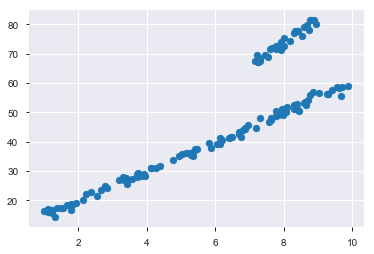

In [67]:
plt.scatter(df['X'],df['Y'])

In [68]:
model=LinearRegression()
model.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
#r=np.array(x).reshape(-1,1)

In [70]:
y_pred=model.predict(np.array(x).reshape(-1,1))

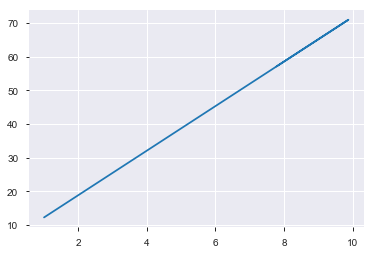

In [71]:
plt.plot(np.array(x).reshape(-1,1),y_pred)

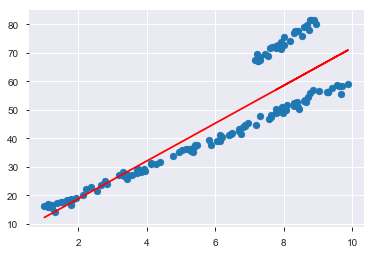

In [72]:
plt.scatter(df['X'],df['Y'])
plt.plot(np.array(x).reshape(-1,1),y_pred,color='red')

#RIDGE AND LASSO

In [73]:
from sklearn.linear_model import Ridge,Lasso

In [74]:
model2=Ridge(alpha=700)
model2.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

Ridge(alpha=700, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:
model3=Lasso(alpha=856)
model3.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

Lasso(alpha=856, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

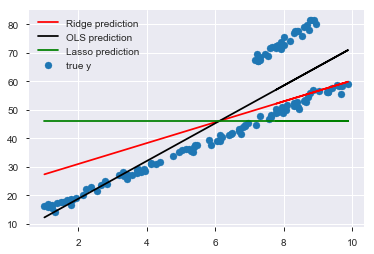

In [76]:
plt.scatter(x,y,label='true y')
plt.plot(x,model2.predict(np.array(x).reshape(-1,1)),color='red',label='Ridge prediction')
plt.plot(x,model.predict(np.array(x).reshape(-1,1)),color='black',label='OLS prediction')
plt.plot(x,model3.predict(np.array(x).reshape(-1,1)),color='green',label='Lasso prediction')
plt.legend(loc='best')

RANSAC

In [77]:
from sklearn.linear_model import RANSACRegressor

In [83]:
model4=RANSACRegressor()

In [79]:
model4.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

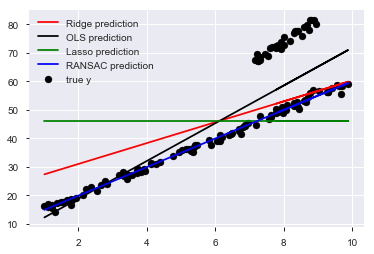

In [81]:
plt.scatter(x,y,label='true y',color='black')
plt.plot(x,model2.predict(np.array(x).reshape(-1,1)),color='red',label='Ridge prediction')
plt.plot(x,model.predict(np.array(x).reshape(-1,1)),color='black',label='OLS prediction')
plt.plot(x,model3.predict(np.array(x).reshape(-1,1)),color='green',label='Lasso prediction')
plt.plot(x,model4.predict(np.array(x).reshape(-1,1)),color='blue',label='RANSAC prediction')


plt.legend(loc='best')